<a href="https://colab.research.google.com/github/elmau21/data-engineer-projects/blob/master/Mauricio_Pacheco_Lizama_WordClouds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import cv2
from wordcloud import WordCloud, ImageColorGenerator

import urllib
import random

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/.config/active_config
/content/.config/.last_survey_prompt.yaml
/content/.config/gce
/content/.config/.last_update_check.json
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/configurations/config_default
/content/.config/logs/2022.11.22/00.13.23.276767.log
/content/.config/logs/2022.11.22/00.13.55.296951.log
/content/.config/logs/2022.11.22/00.13.01.107222.log
/content/.config/logs/2022.11.22/00.12.36.088191.log
/content/.config/logs/2022.11.22/00.13.56.045946.log
/content/.config/logs/2022.11.22/00.13.32.115099.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_test.csv
/content/sample_data/mnist_train_small.csv


![](https://slideplayer.com/slide/9981175/32/images/2/kaggle+What+is+Kaggle+A+data+science+competitions+%3A.jpg)slideplayer.com

In [3]:
df = pd.read_csv("/content/Competitions.csv", delimiter=',', encoding='utf8')
pd.set_option('display.max_columns', None)
df.tail()

,Id,Slug,Title,Subtitle,HostSegmentTitle,ForumId,OrganizationId,CompetitionTypeId,HostName,EnabledDate,DeadlineDate,ProhibitNewEntrantsDeadlineDate,TeamMergerDeadlineDate,TeamModelDeadlineDate,ModelSubmissionDeadlineDate,FinalLeaderboardHasBeenVerified,HasKernels,OnlyAllowKernelSubmissions,HasLeaderboard,LeaderboardPercentage,LeaderboardDisplayFormat,EvaluationAlgorithmAbbreviation,EvaluationAlgorithmName,EvaluationAlgorithmDescription,EvaluationAlgorithmIsMax,ValidationSetName,ValidationSetValue,MaxDailySubmissions,NumScoredSubmissions,MaxTeamSize,BanTeamMergers,EnableTeamModels,EnableSubmissionModelHashes,EnableSubmissionModelAttachments,RewardType,RewardQuantity,NumPrizes,UserRankMultiplier,CanQualifyTiers,TotalTeams,TotalCompetitors,TotalSubmissions
5529,36070,gdsc-data-science-track,GDSC_Damnhour Data Science Track,First ML project,InClass,2103127.0,NaN,1,NaN,04/12/2022 15:58:30,04/23/2022 23:59:00,NaN,NaN,NaN,NaN,True,True,False,True,0,0.0,MSE,Mean Squared Error,The average of the squared errors.,False,NaN,NaN,5,2,10,False,False,False,False,NaN,NaN,1,0.0,False,1,1,1
5530,36363,rsna-2022-cervical-spine-fracture-detection,RSNA 2022 Cervical Spine Fracture Detection,Identify cervical fractures from scans,Featured,2147844.0,1817.0,1,NaN,07/28/2022 17:49:51,10/27/2022 23:59:00,10/20/2022 23:59:00,10/20/2022 23:59:00,11/30/2022 00:00:00,NaN,True,True,True,True,28,0.0,WeightedMeanColumnwiseLogLoss,Weighted Mean Columnwise Log Loss,Mean columnwise log loss with sample weights.,False,NaN,NaN,5,2,5,False,True,False,False,USD,30000.0,8,1.0,True,883,1108,12871
5531,36414,google-universal-image-embedding,Google Universal Image Embedding,Create image representations that work across ...,Research,2153930.0,855.0,1,NaN,07/11/2022 17:09:06,10/10/2022 23:59:00,10/03/2022 23:59:00,10/03/2022 23:59:00,11/23/2022 00:00:00,NaN,True,True,True,True,50,0.0,PostProcessorKernelDesc,PostProcessorKernelDesc,Descending LB order PostProcessor,True,NaN,NaN,5,2,5,False,True,False,False,USD,50000.0,6,1.0,True,1022,1217,20984
5532,37333,mayo-clinic-strip-ai,Mayo Clinic - STRIP AI,Image Classification of Stroke Blood Clot Origin,Research,2296551.0,3809.0,1,NaN,07/06/2022 20:34:00,10/05/2022 23:59:00,09/28/2022 23:59:00,09/28/2022 23:59:00,11/05/2022 00:00:00,NaN,True,True,True,True,7,0.0,WeightedMulticlassLoss,Weighted Multiclass Loss,Negative log likelihood divided by the number ...,False,NaN,NaN,1,2,5,False,True,False,False,USD,10000.0,3,1.0,True,888,1025,6980
5533,37381,ai-village-ctf,AI Village Capture the Flag @ DEFCON,"Hack AI! Collect flags by evading, poisoning, ...",Research,2305023.0,3812.0,1,NaN,08/11/2022 21:33:45,09/12/2022 00:00:00,09/12/2022 00:00:00,09/12/2022 00:00:00,NaN,NaN,True,True,False,True,100,0.0,NvidiaDefconWeightedCategorizationAccuracy,Nvidia Defcon,Custom capture-the-flag metric,True,NaN,NaN,100,100,1,True,False,False,False,USD,25000.0,5,0.0,False,668,668,4235


Get first 3000 joined "Title"values and assign then to `text`.
You will use this later at the end of ht exercise.

In [4]:
text = ' '.join(df['Title'].values)
print("Text: ")
text[:3000]

Text: 


"Forecast Eurovision Voting Predict HIV Progression World Cup 2010 - Take on the Quants INFORMS Data Mining Contest 2010 World Cup 2010 - Confidence Challenge Predict Grant Applications Chess ratings - Elo versus the Rest of the World Tourism Forecasting Part One Tourism Forecasting Part Two R Package Recommendation Engine IJCNN Social Network Challenge RTA Freeway Travel Time Prediction Stay Alert! The Ford Challenge Deloitte/FIDE Chess Rating Challenge Mapping Dark Matter ICDAR 2011 - Arabic Writer Identification Don't Overfit! Heritage Health Prize Wikipedia's Participation Challenge Allstate Claim Prediction Challenge dunnhumby's Shopper Challenge Semi-Supervised Feature Learning Give Me Some Credit UCL CoMPLEX MRes module UCL Applied Machine Learning 2 UW STAT331 Linear Models Contest UMICH SI650 - Sentiment Classification Erasmus University Rotterdam - Econometrie 2  - Prediction Competition Don't Get Kicked! Algorithmic Trading Challenge CHALEARN Gesture Challenge What Do You Kn

Create a wordcloud for df["EvaluationAlgorithmAbbreviation"]

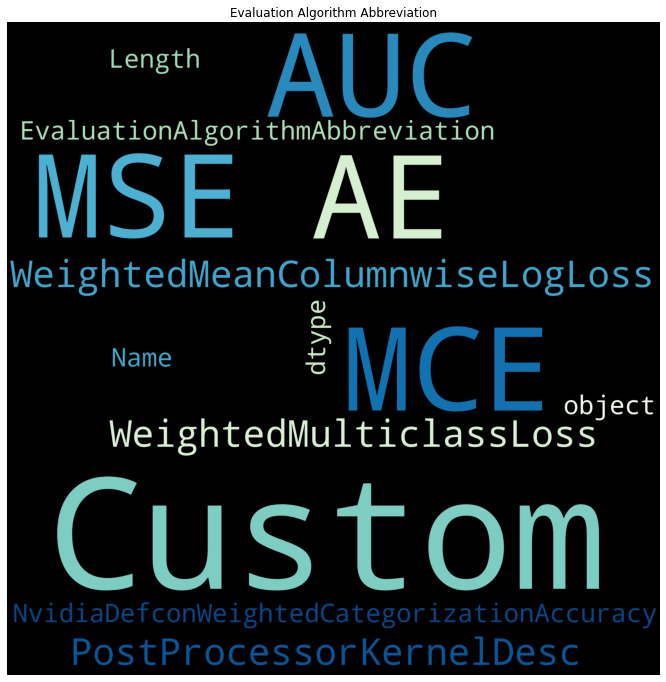

In [14]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      colormap='GnBu', 
                      height =2000,
                      width = 2000
                     ).generate(str(df["EvaluationAlgorithmAbbreviation"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Evaluation Algorithm Abbreviation")
plt.show()

Create wordcloud for df["EvaluationAlgorithmDescription"]

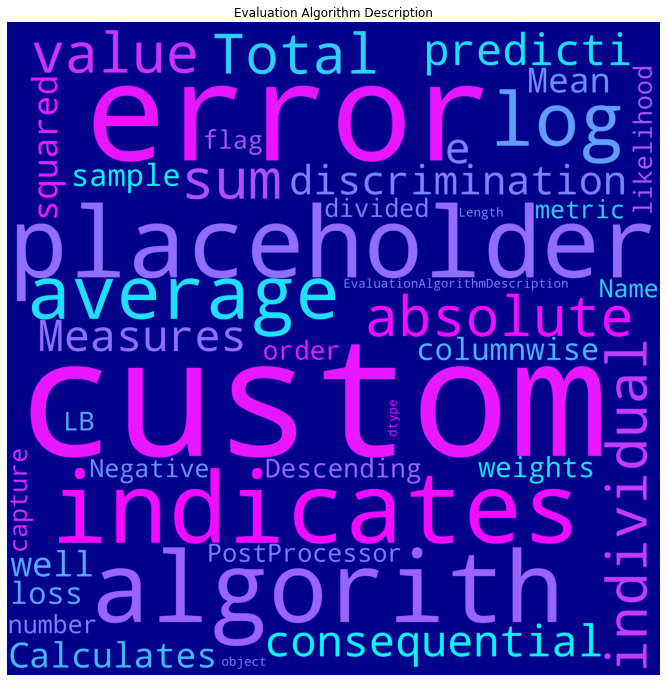

In [12]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'darkblue',
                      colormap='cool', 
                      height =2000,
                      width = 2000
                     ).generate(str(df["EvaluationAlgorithmDescription"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Evaluation Algorithm Description")
plt.show()

Create wordcloud for df["EvaluationAlgorithmName"]

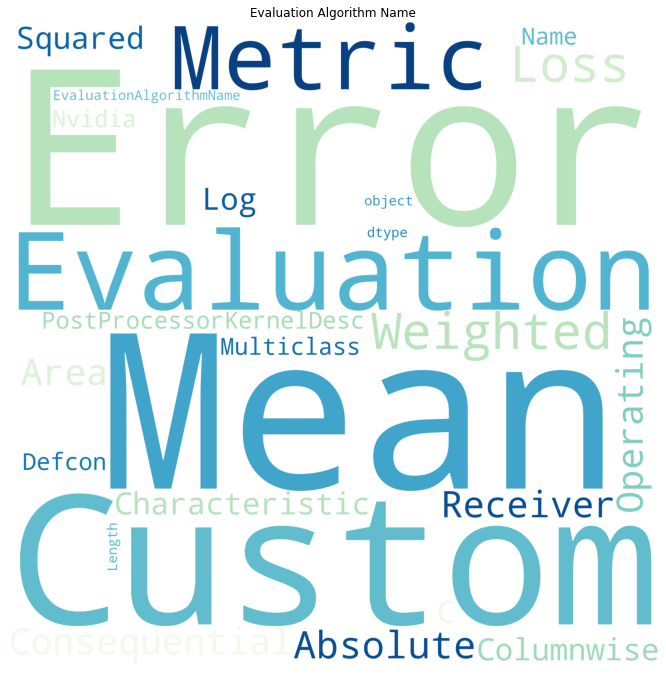

In [13]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'white',
                      colormap='GnBu', 
                      height =2000,
                      width = 2000
                     ).generate(str(df["EvaluationAlgorithmName"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Evaluation Algorithm Name")
plt.show()

Create a wordcloud for df["HostSegmentTitle"])

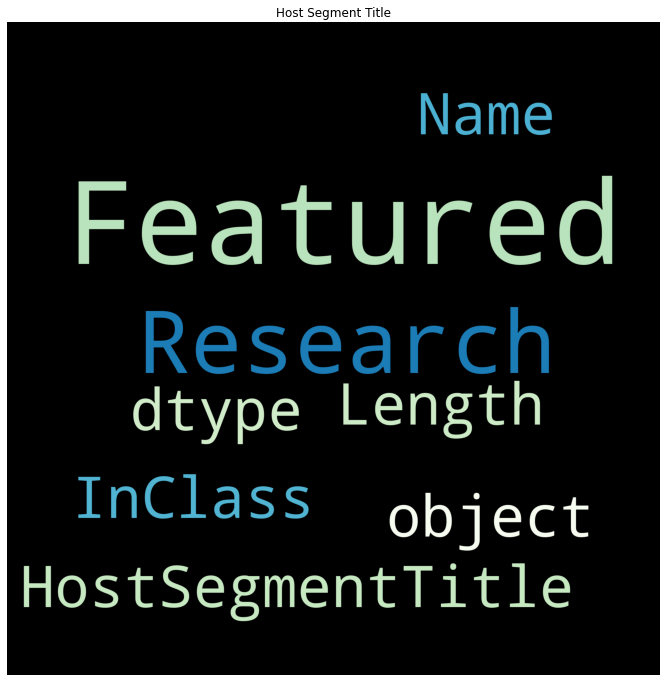

In [8]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',
                      colormap='GnBu', 
                      height =2000,
                      width = 2000
                     ).generate(str(df["HostSegmentTitle"]))
plt.rcParams['figure.figsize'] = (12,12)
plt.axis("off")
plt.imshow(wordcloud)
plt.title("Host Segment Title")
plt.show()


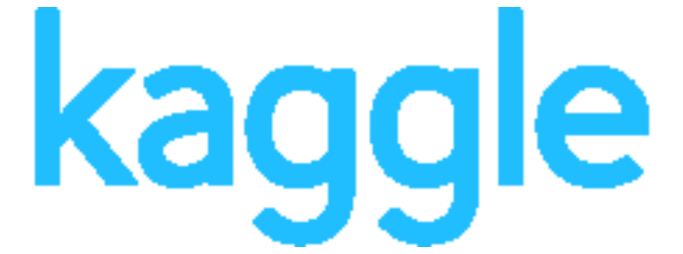

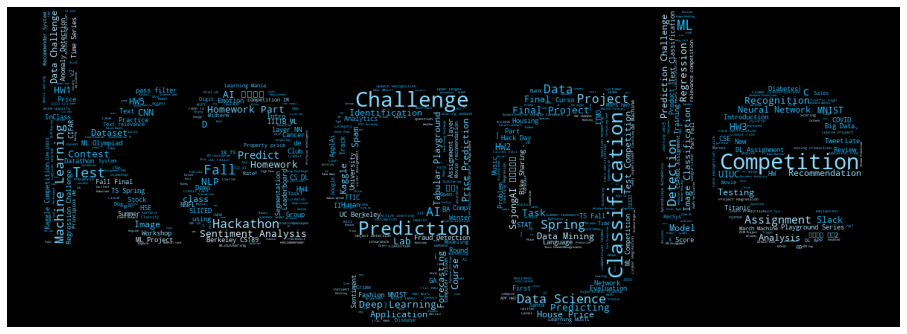

In [11]:
def load_mask(mask_url):
    with urllib.request.urlopen(mask_url) as resp:
        mask = np.asarray(bytearray(resp.read()), dtype="uint8")
        mask = cv2.imdecode(mask, cv2.IMREAD_COLOR)
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
        
    return mask


mask = load_mask("https://www.kaggle.com/static/images/site-logo.png")

plt.imshow(mask)
plt.axis("off");

new_mask = load_mask(
    "https://www.kaggle.com/static/images/site-logo.png"
)
new_mask = cv2.resize(
    new_mask, 
    (new_mask.shape[1] * 5, new_mask.shape[0] * 5),
)

plt.imshow(new_mask)
plt.axis("off")
plt.show()

wordcloud = WordCloud(
    background_color="black",
    colormap='Reds',
    mask=new_mask,
    random_state=42,
    max_words=1000,
)
    
wordcloud.generate(text) 

image_colors = ImageColorGenerator(new_mask)

plt.figure(figsize=(16, 8))
plt.imshow(
    wordcloud.recolor(color_func=image_colors)
)
plt.axis("off")
plt.show()